In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pyreadstat as pr 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy import stats
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import norm

In [54]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [55]:
y = df['salario']
x = df.drop(['salario','noasiat','postgrad'],axis = 1) #Eliminamos las variables que no usaremos
x

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [56]:
reg_lin = sm.OLS(y,sm.add_constant(x)).fit()

In [57]:
print(reg_lin.summary())

OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           7.37e-38
Time:                        17:59:20   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
g

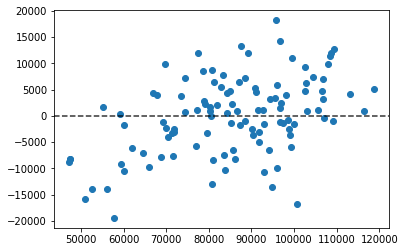

In [58]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(x))
ax.scatter(y, y - y_pred)
plt.axhline(y=0, color = 'black', alpha = 0.8, linestyle = '--')

In [59]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [60]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [61]:
y = np.where(df['salario']>96000,1,0)
x = df.drop(['salario'],axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0.5, 0, 'Y')

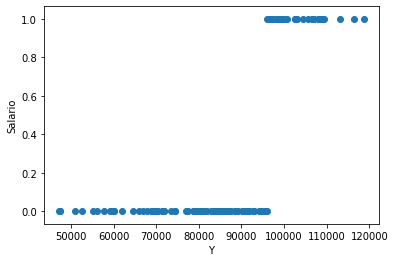

In [62]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y )
ax.set_ylabel('Salario')
ax.set_xlabel('Y')

In [63]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(x,y)
y_estimado_1 = reg_log.predict_proba(x)[:,1]
y_estimado = reg_log.predict(x)

In [64]:
y_estimado_1, y_estimado

(array([5.60461822e-01, 2.18511060e-02, 3.40713796e-01, 1.78408868e-02,
        3.29151263e-01, 7.96981996e-01, 7.75217424e-02, 5.79840206e-01,
        1.96337424e-01, 2.23688334e-02, 9.38905048e-02, 1.52477253e-01,
        4.60623344e-03, 6.80736034e-01, 2.36672162e-01, 2.32983883e-01,
        2.64877181e-02, 4.08086905e-01, 6.22718055e-01, 8.19254265e-04,
        6.79749578e-01, 1.77262355e-01, 4.84578109e-01, 1.19118594e-02,
        4.95105410e-03, 2.22525593e-02, 5.72691371e-01, 1.06357265e-01,
        1.48324507e-02, 3.76063257e-01, 4.46845890e-01, 5.03537624e-01,
        4.76812772e-03, 5.53016419e-01, 1.57016516e-01, 5.90365186e-01,
        7.48524569e-02, 6.18930473e-01, 2.79821150e-01, 4.16278991e-01,
        3.02424904e-01, 1.51683200e-02, 5.59124020e-01, 2.46196442e-01,
        1.44120593e-02, 6.68076012e-01, 7.87662744e-01, 1.26051430e-01,
        8.57368843e-02, 6.64205865e-01, 9.58222158e-01, 9.66547648e-01,
        2.21804096e-02, 4.09341892e-02, 6.53760730e-01, 3.557119

In [65]:
y == y_estimado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
metrics.accuracy_score(y, reg_log.predict(x))

0.9090909090909091